<center>
<img src="https://camo.githubusercontent.com/ad20aaaa48264581c46aa126919dbb72060ebd98cffe015523549b4974843ae5/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f46556c79616e6b696e2f725f70726f626162696c6974792f6d61737465722f656e645f73656d696e6172732f73656d5f362f73747564656e745f746561636865725f646973742e706e67" height="200">

# Прикладная статистика: домашнее задание 2
</center>

> скрррааа па па ка ка ка скидики па па энд э пу пу дррр бум скьа ду ду ку ку тун тун пум пум

$\qquad$ [БутcРэп](https://www.youtube.com/watch?v=eE4qxB2E8d4)


**ФИО:** Куликов Дмитрий Алексеевич

## Общая информация


__Дата выдачи:__ 23.04.2022

__Дедлайн:__ 23:59MSK 14.05.2022

## Формат сдачи

Сам ноутбук называйте в формате hw-02-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет, как обычно, сдать в anytask.

## Оформление

В этом домашнем задании мы будем проверять гипотезы. Во всех задачах подробно обосновывайте выбор критерия для проверки гипотезы и делайте выводы.

In [3]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

## [10 баллов] Задание 1 (рейтинги президентов)

В таблице `presidents.csv` представлены рейтинги различных президентов США (интересно, почему не российских). Социальные опросы проводились раз в квартал. Опрашивалась случайная выборка граждан. У каждого спрашивалось одобряет ли он деятельность президента.

Ричард Никсон был президентом США с 20 января 1969 года по 9 августа 1974 года. 17 июня 1972 года произошёл Уотергейтский скандал. Давайте проанализируем, что при этом произошло с его рейтингом.

In [3]:
df = pd.read_csv('data/presidents.csv')
df.head()

,year,Qtr1,Qtr2,Qtr3,Qtr4
0,1945,NaN,87,82.0,75.0
1,1946,63.0,50,43.0,32.0
2,1947,35.0,60,54.0,55.0
3,1948,36.0,39,NaN,NaN
4,1949,69.0,57,57.0,51.0


Чтобы привести таблицу к удобному виду используйте функцию `pd.melt`. Вытащите из таблички рейтинг Никсона с 1 квартала 1969 года по 2 квартал 1972 года (включая его). Запишите эти данные в переменную `x`. Рейтинг с 3 квартала 1972 года по 2 квартал 1974 года поместите в переменную `y`. Пропуски в данных удалите из выборки.

In [4]:
df_melted = pd.melt(df,
                    id_vars=['year'],
                    value_vars=['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4'],
                    var_name='Qtr',
                    value_name='Rating').sort_values(by=['year', 'Qtr'])

In [5]:
df_melted

,year,Qtr,Rating
0,1945,Qtr1,NaN
30,1945,Qtr2,87.0
60,1945,Qtr3,82.0
90,1945,Qtr4,75.0
1,1946,Qtr1,63.0
...,...,...,...
118,1973,Qtr4,27.0
29,1974,Qtr1,28.0
59,1974,Qtr2,25.0
89,1974,Qtr3,24.0


In [6]:
x = pd.concat([
    df_melted.loc[(df_melted['year'] >= 1969) & (df_melted['year'] < 1972)],
    df_melted.loc[(df_melted['year'] == 1972) & (df_melted['Qtr'].isin(['Qtr1', 'Qtr2']))],
])['Rating'].dropna().to_numpy()

In [7]:
y = pd.concat([
    df_melted.loc[(df_melted['year'] == 1972) & (df_melted['Qtr'].isin(['Qtr3', 'Qtr4']))],
    df_melted.loc[(df_melted['year'] > 1972) & (df_melted['year'] < 1974)],
    df_melted.loc[(df_melted['year'] == 1974) & (df_melted['Qtr'].isin(['Qtr1', 'Qtr2']))],
])['Rating'].dropna().to_numpy()

Правда ли, что после скандала средний рейтинг Никсона рухнул? Предполагайте, что рейтинг распределён нормально, а также, что дисперсия рейтинга не изменилась из-за скандала. Наблюдаемое значение статистики запишите в переменную `obs`, в переменную `pval` запишите $p$-значение.

Проверка гипотезы о средних. Выборки независимые. Дисперсия не известны, но равны.

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_1 = \mu_2 \hspace{2mm} \text{Рейтинг не изменился} \\
&H_1: \hspace{2mm} \mu_1 > \mu_2  \hspace{2mm} \text{Рейтинг упал}
\end{aligned}
$$

Гипотезу проверяю на уровне значимости 5%

In [8]:
alpha = 0.05                                          # уровень значимости = 5%
nx, ny = x.size, y.size                               # размер выборок
diff = x.mean() - y.mean()                            # разность средних

diff_var = ((nx - 1) * x.var(ddof=1) + (ny - 1) * y.var(ddof=1)) / (nx + ny - 2)
diff_std = np.sqrt(diff_var / nx + diff_var / ny)     # стандартное отклонение

t_obs = diff/diff_std                                 # наблюдаемое значение
t_crit = sts.t(df = nx + ny - 2).ppf(1 - alpha)       # критическое значение

print(f'Наблюдаемое значение {t_obs:.3} больше критического {t_crit:.3} => нулевая гипотеза отвергается')

Наблюдаемое значение 3.56 больше критического 1.73 => нулевая гипотеза отвергается


То же самое средствами `statsmodels`.

In [9]:
from statsmodels.stats.weightstats import ttest_ind

t_obs, p_val, _ = ttest_ind(x, y, value=0, alternative='larger')

print(f"Наблюдаемое значение: {t_obs:.3}")
print(f"P-значение: {p_val:.3}")

Наблюдаемое значение: 3.56
P-значение: 0.00111


In [10]:
# небольшая самопроверка
assert np.abs(t_obs - 3.5640741313229793) < 1e-5

**Почему вы выбрали именно этот критерий для проверки гипотезы? Какие выводы вы сделали?**

**Ответ:**

В задаче говорится об использовании гипотезы о средних. Выборки независимые, нормально распредены, кол-во наблюдений небольшое, дисперсии неизвестны, но равны => используем t-статистику, распределение Стьюдента.

Таким образом, после скандала средний рейтинг Никсона рухнул.
P-значение: 0.001

Снова президентом Никсон станет в $3000$ году.

![](https://vignette.wikia.nocookie.net/futurama/images/2/2f/Richard_M._Nixon%27s_head.jpg/revision/latest/scale-to-width-down/250?cb=20131123190522&path-prefix=ru)

## [10 баллов] Задание 2 (доктор сон)

Проводится эксперимент о пользе нового снотворного. Для его проведения используется группа из $10$ студентов. В первый день каждый из них ложится спать. На утро измеряется, сколько он проспал. Из результата вычитают $8$ (нормальное число часов сна). На второй день каждому дают таблетку. Утром снова измеряют, сколько человек проспал, и вычитают $8$. Результаты эксперимента записаны в табличку `sleep.csv`.

In [11]:
df = pd.read_csv('data/sleep.csv')
df.head()

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5


В х будут лежать данные о сне без приема снотворного, в y данные о сне после приема снотворного.

In [12]:
x = df.loc[(df['group'] == 1)]['extra'].to_numpy()

In [13]:
y = df.loc[(df['group'] == 2)]['extra'].to_numpy()

Правда ли, что сон студентов до приёма снотворного не отличается от нормы (отклонение от 8 часов равно нулю). Проверьте эту гипотезу на $5\%$ уровне значимости, в переменную `pval1` запишите p-значение.

In [16]:
alpha = 0.05                          # уровень значимости = 5%

Проверка гипотезы о мат. ожидании при неизвестной дисперсии. Данных немного. Считаем, что дисперсия нам неизвестна. Спрашивается,  об отличии от нормы в среднем по выборке.

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_1 = 0 \hspace{2mm} \text{Сон не отличается от нормы} \\
&H_1: \hspace{2mm} \mu_1 \neq 0  \hspace{2mm} \text{Сон отличается от нормы}
\end{aligned}
$$

Используем t-критерий для среднего, точный

In [24]:
tobs1, pval1 = sts.ttest_1samp(x, popmean=0)
print(f"Наблюдаемое значение: {tobs1:.5}")
print(f"p-val: {pval1:.5}")

Наблюдаемое значение: 1.3257
p-val: 0.2176


p-val > alpha  гипотеза о том, что сон не отличается от нормы не отвергается.

Правда ли, что благодаря таблеткам студенты стали спать больше (односторонняя альтернатива)? Запишите в переменную `pval2` соотвествующее p-значение.

Проверю эту гипотезу на  5%  уровне значимости.

Проверка гипотезы о разности средних,  о связанных парах. Используется 2 группы студентов, измерения делаются на одних и тех же людях.

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_2 = 0 \hspace{2mm} \text{Сон не отличается от нормы} \\
&H_1: \hspace{2mm} \mu_2 > 0  \hspace{2mm} \text{Сон студентов увеличился}
\end{aligned}
$$

In [27]:
tobs2, pval2 = sts.ttest_rel(y, x, alternative="greater")
print(f"Наблюдаемое значение: {tobs2:.5}")
print(f"p-val: {pval2:.5}")

Наблюдаемое значение: 4.0621
p-val: 0.0014164


pvalue < alpha значит нулевая гипотеза отвергается, т.е таблетки увеличивают продолжительность сна.

In [28]:
# самопроверка
assert np.abs(tobs1 - 1.325710) < 1e-5
assert np.abs(tobs2 - 4.062127) < 1e-5

**Почему вы выбрали именно этот критерий для проверки гипотезы? Какие выводы вы сделали?**

**Ответ:**

В первом случае проверялась гипотеза о мат. ожидании при неизвестной дисперсии.Спрашивалось, об отличии от нормы в среднем по выборке. Гипотеза о том, что сон не отличается от нормы не отвергается.


Во втором случае была проверка гипотезы о разности средних, о связанных парах. Используется 2 группы студентов, измерения делаются на одних и тех же людях. Выяснилось что на 5% уровне значимости таблетки увеличивают продолжительность сна.

## [30 баллов] Задание 3 (мудрость)

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её можно лайкнуть. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она будет лайкнута, повышается. Например, цитату

> Можно простить человеку все, кроме отсутствия. (Экзюпери)

мне не очень хотелось бы лайкать. А вот цитата

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков)

совершенно другое дело.

В табличке `df_vk_wise` лежат данные о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке `I` находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено, и будем работать с остатками.

In [141]:
df = pd.read_csv('data/df_vk_wise.csv')[50:]
df.head()

,likes,reposts,text,I
50,549,25,"Я, говорит, люблю человечество, но дивлюсь на ...",True
51,607,22,"Нельзя любить то, что я люблю, да ещё так, как...",True
52,914,37,Если испытываешь по-настоящему глубокое чувств...,False
53,989,34,"— Я тебя люблю, — сказал я. \n— Это пройдет, —...",True
54,1229,32,"Он очаровательно рассказывает мне о том, как о...",False


Постройте гистограмму для числа лайков постов, содержащих личные местоимения и не содержащих. Как думаете, есть ли с распределением лайков какие-то проблемы?

In [142]:
x = df[df['I'] == True]['likes'] # содержит местоимения
y = df[df['I'] == False]['likes'] # не содержит местоимения

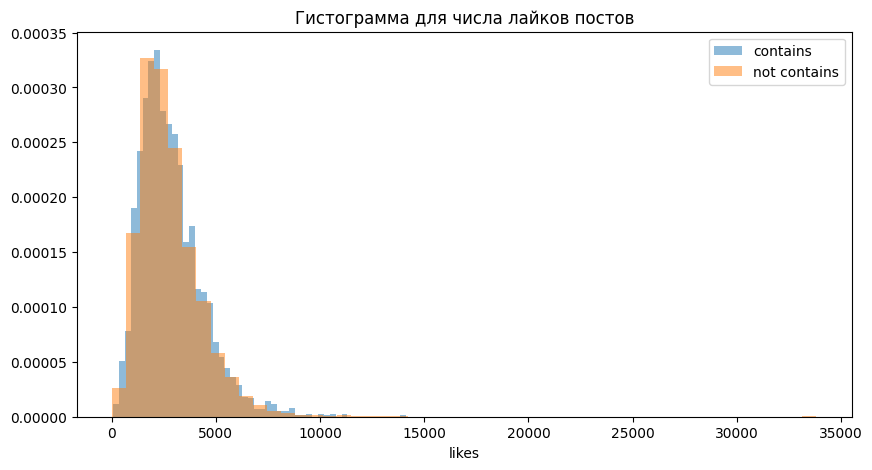

In [144]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(x, bins=50, density=True, alpha=0.5, label='contains')
ax.hist(y, bins=50, density=True, alpha=0.5, label='not contains')

ax.set_xlabel('likes')
ax.set_title('Гистограмма для числа лайков постов')
plt.legend();

Да, проблемы есть. Это выбросы. Хвосты на гистограммах оказываются очень длинными. Найдите медианы и средние для числа лайков. Сравните их между собой.

In [145]:
print(f'Для содержащих местоимения: mean = {x.mean()}, median = {x.median()}')
print(f'Для несодержащих местоимения: mean = {y.mean()}, median = {y.median()}')

Для содержащих местоимения: mean = 2879.1828885400314, median = 2588.5
Для несодержащих местоимения: mean = 2784.0432051478474, median = 2497.0


Mean и median для содержащих местоимения больше, чем для не содержащих.

Проверьте гипотезу о равенстве среднего числа лайков. Используйте для этого $z$-тест, основанный на ЦПТ. Дисперсию расчитывайте по выборке, используя несмещённую оценку `(ddof=1)`. Запишите наблюдаемое значение статистики в переменную `z_obs`.

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_1 = \mu_2 \hspace{2mm} \text{Среднее число лайков не отличается} \\
&H_1: \hspace{2mm} \mu_1 \neq \mu_2  \hspace{2mm} \text{Среднее число лайков отличается}
\end{aligned}
$$

Проверяю гипотезу на уровне значимости 5%

In [40]:
alpha = 0.05                     # уровень значимости = 5%
nx, ny = x.size, y.size          # размер выборок

diff = x.mean() - y.mean()       # разность средних
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/ny)   # стандартное отклонение

z_obs = diff/diff_std            # наблюдаемое значение

In [41]:
z_obs

2.6644610922505323

Найдите критическое значение статистики. Сравните его с наблюдаемым. Рассчитайте p-value для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Критическое значение статистики запишите в переменную `z_crit`, а p-значение в переменную `pval`.

In [42]:
z_crit = sts.norm.ppf(1 - alpha / 2)      # критическое значение
p_val =  2 * (1 - sts.norm.cdf(np.abs(z_obs))) # двухсторонняя

In [43]:
z_crit

1.959963984540054

In [45]:
print(f'Наблюдаемое значение {z_obs:.4} больше критического {z_crit:.4} => нулевая гипотеза отвергается')

Наблюдаемое значение 2.664 больше критического 1.96 => нулевая гипотеза отвергается


In [44]:
p_val

0.007711178605442903

*Вывод*: гипотеза о том, что среднее число лайков не отличается отвергается.

Можно заметить, что у распределения числа репостов длинные хвосты. В данных есть выбросы, которые завышают среднее значение. Если выбросы сильные, то ЦПТ может ломаться. Из-за этого имеет смысл в данном случае использовать другой критерий. Например, критерий Манна-Уитни.

Найдите наблюдаемое значение статистики Манна-Уитни. Сравните его с критическим. Рассчитайте p-value для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Отличается ли полученный вывод от вывода
z-теста?

In [46]:
sts.mannwhitneyu(x, y, alternative='two-sided')

MannwhitneyuResult(statistic=8604129.5, pvalue=0.01004067464288777)

`p_val < alpha` значит нулевая гипотеза отвергается, среднее число лайков отличается.

Сравнивая z-test и тест Манна-Уитни, стоит отметить, что z-test более уверен в том, что нужно отвергать нулевую гипотезу. Для z-test p-value=0.0077, а в тесте Манна-Уитни p-value=0.01.

Проверьте гипотезу о мудрости с помощью бутстрапа. Нулевую гипотезу сформулируйте в терминах медиан.

$$
\begin{aligned}
&H_0: \hspace{2mm} med(x) = med(y) \hspace{2mm} \text{медианное число лайков одинаковое} \\
&H_1: \hspace{2mm} med(x) \neq med(y)  \hspace{2mm} \text{медианное число лайков отличается}
\end{aligned}
$$

In [47]:
def calc_median(x, y, *args):
    return np.median(x) - np.median(y)

In [48]:
sts.bootstrap(data=(x, y), statistic=calc_median, method='basic', random_state=42)

BootstrapResult(confidence_interval=ConfidenceInterval(low=11.5, high=168.5), bootstrap_distribution=array([ 96. ,  71.5,  98.5, ...,  39.5, 102. ,  88. ]), standard_error=40.248824178539294)

Доверительный интервал (low=11.5, high=168.5) не содержит нуля, значит нулевая гипотеза отвергается (разность медиан не равна нулю). Расчитанных статистики (разность медиан) сильно отличаются от нуля.
Бутстрап показал, что среднее число лайков отличается.


Таким образом, все тесты подтвердили что среднее число лайков отличается.

## [10 баллов] Задание 4 (мыши и зеркало)

$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif)

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом.

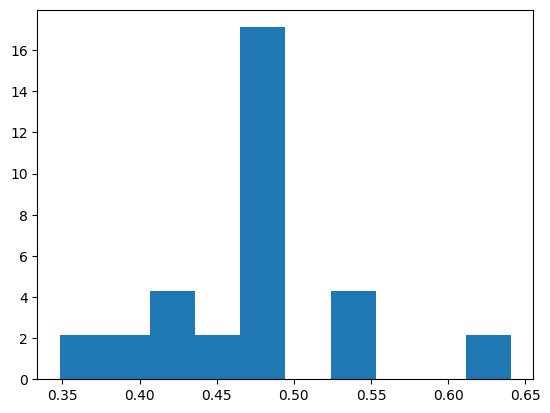

In [4]:
x = pd.read_csv('data/mouses_mirror.txt', header = None)[0].values
plt.hist(x, density=True);

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью критерия знаков. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия. Запишите в переменную `pvalue_1` получившееся в результате этого $p$-значение.

Критерий знаков

H_0: медиана доли времени, проведенного в клетке с зеркалом, равна 0.5, т.е мышкам безразлично в какой комнате проводить время.


H_1: медиана доли времени, проведенного в клетке с зеркалом, не равна 0.5, т.е мышкам не безразлично в какой комнате проводить время.

Основные особенности критерия знаков:
1. Непараметрический критерий
2. Критерий знаков позволяет проверять гипотезу о равенстве медианы и отсутствии сдвига в связных выборках
3. Критерий знаков игнорирует величину изменений и обращает внимание только на её направление. Из за этого происходит потеря части информации о выборке.
4. Выбросы в данных не будут оказывать влияние на результат
5. Предположений о законе распределения не требуется

In [5]:
from statsmodels.stats.descriptivestats import sign_test

obs_1, pvalue_1 = sign_test(x, 0.5)

print(f"наблюдаемое значение: {obs_1:.5}")
print(f"p-val: {pvalue_1:.5}")


наблюдаемое значение: -5.0
p-val: 0.021271


Если проверяем гипотезу на уровне значимости alpha=5%, то нулевая гипотеза отвергается, мышке не безразлично в какой комнате проводить время. Но при alpha=1% нулевая гипотеза не отвергается.

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_2` получившееся в результате этого $p$-значение.

Пусть t - доля времени, проведенная в комнате с зеркалом


H_0: $ med(t) = 0.5 $ - мышкам безразлично в какой комнате проводить время

H_1: $ med(t) \neq 0.5 $ - мышкам не безразлично в какой комнате проводить время


Основные особенности критерия Вилкоксона:
1. Ранговый непараметрический критерий
2. Ранговые критерии превращают выборку в ранги наблюдений и позволяют больше сохранить наблюдений
3. Чтобы сохранить информацию, приходится делать дополнительные предположения. У Вилкоксона накладывается предположение, что выборка пришла из симметричного распределения относительно медианы.Это дополнительное предположение не особо сильное по сравнению с параметримечискими.
4. Статистика Вилкоксона имеет табличное распределение

In [6]:
obs_2, pvalue_2 = sts.wilcoxon(x - 0.5)

print(f"наблюдаемое значение: {obs_2:.5}")
print(f"p-val: {pvalue_2:.5}")


наблюдаемое значение: 35.0
p-val: 0.093445


Если проверяем гипотезу на уровне значимости alpha=10%, то нулевая гипотеза отвергается, т.е. мышке не безразлично в какой комнате проводить время. Но при уровнях значимости alpha=1% или alpha=5%  нулевая гипотеза не отвергается.

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_3` получившееся в результате этого $p$-значение.

Пусть t - доля времени, проведенная в комнате с зеркалом


H_0: $ t = 0.5 $ - мышкам безразлично в какой комнате проводить время \\
H_1: $ t \neq 0.5 $ - мышкам не безразлично в какой комнате проводить время

Основные особенности 𝑧 -критерия:
- точный критерий
- асимптиточеский критерий требует: наблюдения ~ iid, отсутствие выбросов, большую выборку (Big Data, т.к критерий основан на ЦПТ).


PS: Однако в нашей выборке всего 16 наблюдений , что не является Big Data

In [9]:
from statsmodels.stats.weightstats import ztest

z_obs, pvalue_3 = ztest(x, value=0.5)

print(f"наблюдаемое значение: {z_obs:.5}")
print(f"p-val: {pvalue_3:.5}")

наблюдаемое значение: -1.4962
p-val: 0.13461


Получается, что при любом разумном уровне значимости alpha=10% или alpha=5% или alpha=1% нулевая гипотеза не отвергается, мышке безразлично в какой комнате проводить время.

In [10]:
# проверка того, что задание решено верно
assert pvalue_1 < 0.05
assert pvalue_2 > 0.05
assert pvalue_3 > 0.05

Объясните, почему `pvalue` от теста к тесту ведёт себя именно так. Подробнее про опыт с мышками читайте [в оригинальном исследовании.](https://www.sciencedirect.com/science/article/abs/pii/S0168159104000061)

__Ответ:__

Используя критерий знаков мы учитывали только знаки и в следствии чего теряли часть информации и казалось, что разница есть. Однако при учете не только знаков, а также доли времени (ранговый критерий Вилкоксона или асимптотический z-тест), стало ясно, что мышке безразлично в какой комнате проводить время.

## [10 баллов] Задание 5 (ломаем тест Манна-Уитни)

Придумайте пример, на котором тест Манна-Уитни не будет работать.

__Hint:__ Главная предпосылка теста заключается в том, что распределение не меняется, но у него происходит сдвиг. Воспользуйтесь этим.

\begin{equation*}
    \begin{aligned}
    & H_0: F_X(x) = F_Y(y) \\
    & H_A: F_X(x) = F_Y(y + m), m \ne 0
    \end{aligned}
\end{equation*}


<center>
<img src='https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/sem12_more_ab/mw.png' align='center' width="300x">
</center>


Например, проводится А/Б тест где проверяется воздействие на людей снотворного. Тест Манна-Уитни сломается в ситуации, если наше воздействие поляризовало людей. В таком случае тест его не поймает.

In [135]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz

np.random.seed(seed=42)

x_norm = sts.norm.rvs(size = 10**5, loc=0, scale=1, random_state=42)

sample1 = sts.norm.rvs(size=10**5, loc=-5, scale=1, random_state=42)
sample2 = sts.norm.rvs(size=10**5, loc=5, scale=1, random_state=42)
x_bimodal = np.random.choice(np.concatenate([sample1, sample2]),
                             size=10**5)


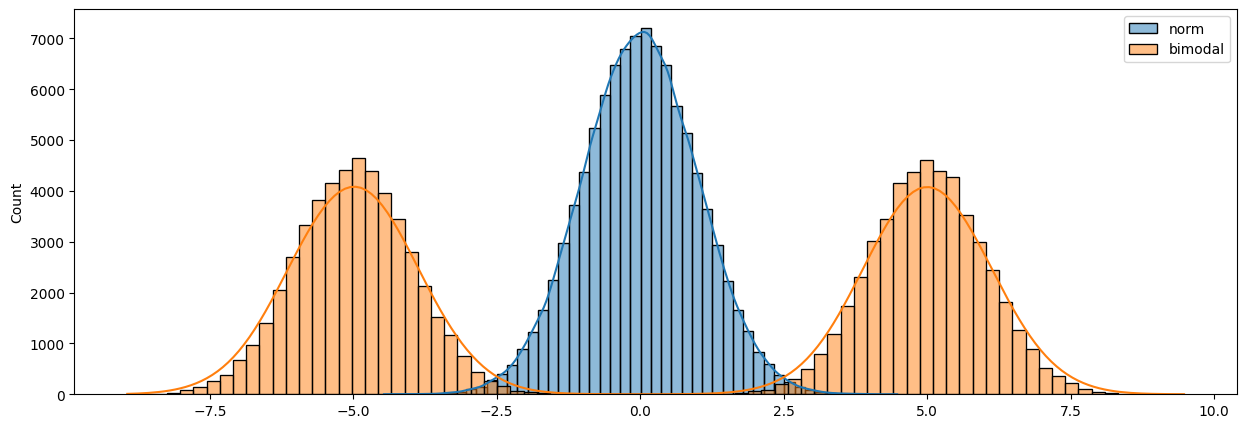

In [140]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.histplot(x_norm, bins=50, label="norm", kde=True)
sns.histplot(x_bimodal, bins=80, label="bimodal",  kde=True)
plt.legend()
plt.show()

## [10 баллов] Задание 6 (проблема подглядывания)

Предположим, что мы отошли от классической схемы проведения АБ тестов и решили подводить итоги на уровне значимости 5% каждый день. Мы держим тест две недели. Если хотябы в один из дней p-value оказывается ниже $0.05,$ мы останавливаем тест и делаем выводы, что гипотеза не отвергается.

Так делать нельзя. Это называется проблемой подглядывания. В случае такой процедуры уровень значимости выходит из-под контроля. Давайте убедимся в этом с помощью симуляций.

- Запланируйте АБ-тест для долей таким образом, чтобы ошибка 1 и 2 рода были равны 5%. В качестве MDE возьмите любое значение.
- Сгенерируйте нужное количество наблюдений. Разбейте его на 14 частей (тест идет 2 недели)
- Проверяйте гипотезу каждый день и останавливайтесь, если она не отвергается
- Какими оказались ошибки 1 и 2 рода в реальности?

Симуляции надо провести отдельно для верности нулевой гипотезы и отдельно для верности альтернативной гипотезы.

In [127]:
# получить количество наблюдений
def get_count_obs(MDE, alpha, beta):
    za = sts.norm().ppf(1 - alpha)
    zb = sts.norm().ppf(1 - beta)
    return int(np.ceil((za + zb) / MDE)**2)


# создать группы при верной нулевой гипотезе
def gen_groups_h0_true(p_0, size):
    group_0 = np.random.binomial(n=1, p=p_0, size=size)
    group_a = np.random.binomial(n=1, p=p_0, size=size)
    return group_0, group_a


# создать группы при верной альтернативной гипотезе
def gen_groups_ha_true(p_0, p_a, size):
    group_0 = np.random.binomial(n=1, p=p_0, size=size)
    group_a = np.random.binomial(n=1, p=p_a, size=size)
    return group_0, group_a

def simulations(days, group_0, group_a, alpha):
    for i in range(1, days + 1):
        z_obs, p_val = ztest(group_a[:i].reshape(-1),
                             group_0[:i].reshape(-1),
                             alternative='larger')

        if p_val < alpha:
            return 1
    return 0

In [131]:
np.random.seed(seed=42)

alpha = 0.05
beta = 0.05
p_0 = 0.2
p_a = 0.3
mde = p_a - p_0
days = 14

n_obs = get_count_obs(mde, alpha, beta) // days

n_simulations = 10**4


Симуляции для верности нулевой гипотезы

In [132]:
res = []
for i in range(n_simulations):
    group_0, group_a = gen_groups_h0_true(p_0, size=(days, n_obs))
    res.append(simulations(days, group_0, group_a, alpha))

print(f'Ошибка 1го рода = {np.mean(res)}')
print(f'Ошибка 2го рода = {1 - np.mean(res)}')

Ошибка 1го рода = 0.1859
Ошибка 2го рода = 0.8141


Ошибка 1го рода стала больше, чем мы закладывали, чаще выбирается альтернативная гипотеза при верной нулевой гипотезе.

Симуляции для верности альтернативной гипотезы

In [133]:
res = []
for i in range(n_simulations):
    group_0, group_a = gen_groups_ha_true(p_0, p_a, size=(days, n_obs))
    res.append(simulations(days, group_0, group_a, alpha))

print(f'Ошибка 1го рода = {np.mean(res)}')
print(f'Ошибка 2го рода = {1 - np.mean(res)}')

Ошибка 1го рода = 1.0
Ошибка 2го рода = 0.0


Ошибка 2го рода стала равна 0, хотя закладывали 5%. Никогда не принимается нулевая гипотеза. Это происходит потому что симуляция прерывается как только в новом дне нулевая гипотеза отверглась, т.е искусственно увеличиваем количество ошибочных положительных ситуаций.

## [20 баллов] Задание 7 (онлифанс)

Эта задача на то, что ты выигрываешь или проигрываешь, если отказываешься от АБ-тестов и просто принимаешь решение об изенениях по среднему. Задание довольно творческое, так как способ симуляции вам предстоит придумать самостоятельно.

У Аделины и Беллы есть аккаунты на онлифанс с конверсией $p=0.2\%$. Они меняют вёрстки и смотрят, как дела с деньгами. Белла нанаяла аналитика и принимает решения об изменениях по $p-value < 0.05,$ а Аделина просто смотрит на среднее и катит по нему. Например, если на старом дизайне из тысячи посетителей только $299$ оставило копеечку, а на новом — $300$, берём новый. Если наоборот — оставляем старый.

Пусть у каждой было $100$ правочек. Правочки одинаковые для обеих девушек. На них работает один и тот же фронтендер. Будем считать, что правочки независимы друг от друга. То есть, в какой бы момент мы не выкатили правочку, у нас всегда от неё будет одинаковое воздействие на конверсию. У каждой девушки было $100$ правочек. Кто после сотни правочек вырвется вперёд по конверсии?

In [87]:
def get_size_audience(mde, alpha, beta):
    za = sts.norm().ppf(1 - alpha)
    zb = sts.norm().ppf(1 - beta)
    return int(np.ceil((za + zb) / mde)**2)

def gen_groups(p_0, p_a, size):
    group_0 = np.random.binomial(n=1, p=p_0, size=size)
    group_a = np.random.binomial(n=1, p=p_a, size=size)
    return group_0, group_a

Допущения:
1. Пусть у Аделины и Беллы одинаковое кол-во аудитории.
2. Аделина считает конверсию (среднее) по всем людям в контрольной и тестовой группе и сравнивает их.

Проверка гипотезы для Беллы:

Пусть
$p_0$ - конверсии в старой версии (контрольная группа)
$p_a$ - конверсии в новой версии (тестовая группа)

$$
\begin{aligned}
&H_0: \hspace{2mm} p_0 = p_a \hspace{2mm} \text{новое изменение не повлияло на конверсию}\\
&H_1: \hspace{2mm} p_0 < p_a \hspace{2mm} \text{новое изменение увеличило конверсию}
\end{aligned}
$$

Гипотезы через MDE:
$$
\begin{aligned}
&H_0: \hspace{2mm} MDE = 0 \\
&H_1: \hspace{2mm} MDE > 0
\end{aligned}
$$

Функции для принятия решений:

In [95]:
def decision_adeline(group_0, group_a):
  return np.mean(group_a) > np.mean(group_0)


def decision_bella(group_0, group_a, alpha):
    _, p_val = ztest(group_a, group_0, alternative='larger')
    return p_val < alpha

def simulations(n_simulations,
                alpha,
                conversion_rate,
                audience_size_bella,
                audience_size_adeline,
                gen_conversions):

    conversion_bella = conversion_rate
    conversion_adeline = conversion_rate

    for i in range(n_simulations):
        new_conversion_bella = np.clip(conversion_bella + gen_conversions[i], 0, 1)
        new_conversion_adeline = np.clip(conversion_adeline + gen_conversions[i], 0, 1)

        g0_bella, ga_bella = gen_groups(conversion_rate, new_conversion_bella, audience_size_bella)
        g0_adeline, ga_adeline = gen_groups(conversion_rate, new_conversion_adeline, audience_size_adeline)

        if decision_bella(g0_bella, ga_bella, alpha):
            conversion_bella = new_conversion_bella

        if decision_adeline(g0_adeline, ga_adeline):
            conversion_adeline = new_conversion_adeline

    return conversion_bella, conversion_adeline

Проверим симуляции на разной аудитории Аделины: равно,  меньше и больше аудитории Беллы. А так же проверим влияние seed, чтобы убедиться, что результаты не привязаны к определенному ГСЧ.

In [134]:
alpha = 0.05
beta = 0.05

p_0 = 0.002 # конверсия
p_a = 0.005
mde = p_a - p_0

# требуемое количество наблюдений,
audience_size = get_size_audience(mde, alpha, beta)
num_trials = 100  # Количество правок

audience_size_bella = audience_size
audience_size_less_bella = int(0.01 * audience_size_bella)
audience_size_more_bella = audience_size_bella * 10
audience_sizes_adeline = [audience_size_bella, audience_size_less_bella, audience_size_more_bella]

In [99]:
seeds = [42, 123, 228]

results = []

for seed in seeds:
    # генерируем изменения конверсии из нормального распределения
    gen_conversions = sts.norm.rvs(loc=0, scale=0.005, size=num_trials, random_state=seed)

    for audience_size_adeline in audience_sizes_adeline:
        conversion_bella, conversion_adeline = simulations(num_trials,
                                                          alpha,
                                                          p_0,
                                                          audience_size_bella,
                                                          audience_size_adeline,
                                                          gen_conversions)

        results.append({
            'seed': seed,
            'audience_size_bella': audience_size_bella,
            'audience_size_adeline': audience_size_adeline,
            'conversion_bella': conversion_bella,
            'conversion_adeline': conversion_adeline,
        })


In [100]:
df = pd.DataFrame(results)
df

,seed,audience_size_bella,audience_size_adeline,conversion_bella,conversion_adeline
0,42,1203409,1203409,0.013655,0.013655
1,42,1203409,12034,0.013655,0.013686
2,42,1203409,12034090,0.013655,0.013655
3,123,1203409,1203409,0.049286,0.049286
4,123,1203409,12034,0.049286,0.046818
5,123,1203409,12034090,0.049286,0.049286
6,228,1203409,1203409,0.026643,0.026278
7,228,1203409,12034,0.026643,0.025664
8,228,1203409,12034090,0.026278,0.026278


Вывод:

1. Если сравнивать одинаковый размер аудитории, то конверсии примерно равны. (отличаются не сильно на seed=228)
2. Если учитывать что размер аудитории Беллы больше, то при seed=123 и seed=228 конверсия Беллы выше. Скорее всего в меньшую выборку Аделины попадают выбросы или среднее может быть смещено. И Аделина чаще принимает неверные решения.
3. Если учитывать, что размер аудитории Аделины в 10 раз больше, то разницы между принимаемые решениями нет, конверсии примерно равны. Выборку Аделины, я думаю можно назвать Big Dat'ой.